In [221]:
import pandas as pd
import numpy as np
from haversine import haversine
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow import keras
import numpy as np
from numpy import concatenate
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [222]:
df = pd.read_csv('final3_english.csv',encoding='cp949')

In [223]:
df.isnull().sum()

apart_code          0
YYYYMM              0
apart__name         0
sigungu             0
town_name           0
address             0
sale_type        2628
area_m3             0
floor               0
const_year          0
parking          1926
GPS_X               0
GPS_Y               0
crime_rate          0
building_year       0
market_dist         0
busstop_dist        0
subway_dist         0
school_dist         0
kinder_dist         0
hospital_dist       0
ASPI                0
YYYY                0
MM                  0
HAI              3269
PIR              4222
LIR              4222
GDP               228
GDI               228
GNI               228
CPI                 0
avg_interest      228
cospi               0
M2                228
house_CCSI        228
unsold            228
prices              0
dtype: int64

In [224]:
df = df[df['sale_type'].notna()]
df = df[df['parking'].notna()]
df = df[df['HAI'].notna()]
df = df[df['M2'].notna()]

In [225]:
df

,apart_code,YYYYMM,apart__name,sigungu,town_name,address,sale_type,area_m3,floor,const_year,...,GDP,GDI,GNI,CPI,avg_interest,cospi,M2,house_CCSI,unsold,prices
0,A10024240,201201,무지개,서울특별시 서초구 서초동,서초동,서울특별시 서초구 효령로 391,임대+분양,101.81,1,1978,...,361724.2,343229.4,345819.5,91.242,5.79,"1,955.79",1757058.7,106.0,1890.0,79000
1,A10024240,201201,무지개,서울특별시 서초구 서초동,서초동,서울특별시 서초구 효령로 391,임대+분양,101.10,11,1978,...,361724.2,343229.4,345819.5,91.242,5.79,"1,955.79",1757058.7,106.0,1890.0,81200
2,A10024240,201201,무지개,서울특별시 서초구 서초동,서초동,서울특별시 서초구 효령로 391,임대+분양,77.71,6,1978,...,361724.2,343229.4,345819.5,91.242,5.79,"1,955.79",1757058.7,106.0,1890.0,64000
3,A10024240,201201,무지개,서울특별시 서초구 서초동,서초동,서울특별시 서초구 효령로 391,임대+분양,101.10,3,1978,...,361724.2,343229.4,345819.5,91.242,5.79,"1,955.79",1757058.7,106.0,1890.0,78800
4,A10024603,201201,아이파크종암동2차,서울특별시 성북구 종암동,종암동,서울특별시 성북구 종암로9길 71,임대,84.73,5,2005,...,361724.2,343229.4,345819.5,91.242,5.79,"1,955.79",1757058.7,106.0,1890.0,46000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721793,A41279914,202203,은평뉴타운마고정2단지,서울특별시 은평구 진관동,진관동,서울특별시 은평구 진관2로 60,임대+분양,101.98,11,2009,...,467351.1,450242.2,455546.7,106.060,3.50,"2,757.65",3672133.4,107.4,180.0,139000
721794,A41279922,202203,은평뉴타운 제각말 푸르지오(5-2단지),서울특별시 은평구 진관동,진관동,서울특별시 은평구 연서로48길 11,분양,84.89,7,2010,...,467351.1,450242.2,455546.7,106.060,3.50,"2,757.65",3672133.4,107.4,180.0,110000
721795,A41279925,202203,은평뉴타운 제각말 푸르지오(5-3단지),서울특별시 은평구 진관동,진관동,서울특별시 은평구 연서로 487,분양,101.90,4,2010,...,467351.1,450242.2,455546.7,106.060,3.50,"2,757.65",3672133.4,107.4,180.0,122000
721796,B11680014,202203,압구정대원칸타빌아파트,서울특별시 강남구 신사동,신사동,서울특별시 강남구 압구정로48길 15,분양,97.08,3,2001,...,467351.1,450242.2,455546.7,106.060,3.50,"2,757.65",3672133.4,107.4,180.0,188000


In [226]:
exiting_code = df['apart_code'].unique()
exiting_code

array(['A10024240', 'A10024603', 'A10024621', ..., 'A10024828',
       'A10023991', 'A10024359'], dtype=object)

In [227]:
df.keys()

Index(['apart_code', 'YYYYMM', 'apart__name', 'sigungu', 'town_name',
       'address', 'sale_type', 'area_m3', 'floor', 'const_year', 'parking',
       'GPS_X', 'GPS_Y', 'crime_rate', 'building_year', 'market_dist',
       'busstop_dist', 'subway_dist', 'school_dist', 'kinder_dist',
       'hospital_dist', 'ASPI', 'YYYY', 'MM', 'HAI', 'PIR', 'LIR', 'GDP',
       'GDI', 'GNI', 'CPI', 'avg_interest', 'cospi', 'M2', 'house_CCSI',
       'unsold', 'prices'],
      dtype='object')

In [228]:
df_vary = df.drop_duplicates(['apart_code'])

In [229]:
df_vary

,apart_code,YYYYMM,apart__name,sigungu,town_name,address,sale_type,area_m3,floor,const_year,...,GDP,GDI,GNI,CPI,avg_interest,cospi,M2,house_CCSI,unsold,prices
0,A10024240,201201,무지개,서울특별시 서초구 서초동,서초동,서울특별시 서초구 효령로 391,임대+분양,101.8100,1,1978,...,361724.2,343229.4,345819.5,91.242,5.79,"1,955.79",1757058.7,106.0,1890.0,79000
4,A10024603,201201,아이파크종암동2차,서울특별시 성북구 종암동,종암동,서울특별시 성북구 종암로9길 71,임대,84.7300,5,2005,...,361724.2,343229.4,345819.5,91.242,5.79,"1,955.79",1757058.7,106.0,1890.0,46000
7,A10024621,201201,태흥,서울특별시 관악구 신림동,신림동,서울특별시 관악구 호암로 541,분양,59.8600,18,1995,...,361724.2,343229.4,345819.5,91.242,5.79,"1,955.79",1757058.7,106.0,1890.0,23100
8,A10024636,201201,세양청마루,서울특별시 노원구 월계동,월계동,서울특별시 노원구 석계로13길 35,분양,64.1830,8,2005,...,361724.2,343229.4,345819.5,91.242,5.79,"1,955.79",1757058.7,106.0,1890.0,25700
9,A10024638,201201,관악월드메르디앙,서울특별시 관악구 봉천동,봉천동,서울특별시 관악구 관악로28길 80,분양,79.2700,6,2005,...,361724.2,343229.4,345819.5,91.242,5.79,"1,955.79",1757058.7,106.0,1890.0,35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714362,A10027985,202109,엘에이치강남힐스테이트,서울특별시 강남구 자곡동,자곡동,서울특별시 강남구 자곡로3길 21,임대+분양,59.9300,11,2015,...,478189.5,466346.0,471235.4,103.170,2.96,"3,068.82",3513680.6,131.8,55.0,123500
716289,A10024131,202110,래미안라클래시,서울특별시 강남구 삼성동,삼성동,서울특별시 강남구 삼성로 651,임대+분양,84.9900,15,2021,...,505571.7,487122.0,492461.1,103.350,3.07,"2,970.68",3543363.7,120.6,55.0,328000
718903,A10024828,202112,DMC롯데캐슬더퍼스트,서울특별시 은평구 수색동,수색동,서울특별시 은평구 수색로 300,임대+분양,59.9600,7,2021,...,505571.7,487122.0,492461.1,104.040,3.25,"2,977.65",3620057.4,103.2,54.0,103000
719659,A10023991,202201,태릉해링턴플레이스,서울특별시 노원구 공릉동,공릉동,서울특별시 노원구 공릉로34길 86,임대+분양,59.9800,12,2022,...,467351.1,450242.2,455546.7,104.690,3.45,"2,663.34",3634342.4,101.4,47.0,95000


In [230]:
df.isnull().sum()

apart_code         0
YYYYMM             0
apart__name        0
sigungu            0
town_name          0
address            0
sale_type          0
area_m3            0
floor              0
const_year         0
parking            0
GPS_X              0
GPS_Y              0
crime_rate         0
building_year      0
market_dist        0
busstop_dist       0
subway_dist        0
school_dist        0
kinder_dist        0
hospital_dist      0
ASPI               0
YYYY               0
MM                 0
HAI                0
PIR              948
LIR              948
GDP                0
GDI                0
GNI                0
CPI                0
avg_interest       0
cospi              0
M2                 0
house_CCSI         0
unsold             0
prices             0
dtype: int64

주변의 아파트 구하기

In [231]:
df_range = df_vary[['apart_code','GPS_X','GPS_Y']]

exiting_code에 존재하는 아파트 코드만 사용할 것

A41279923 단지를 중심으로(다음 행 아파트 코드 하나만 수정할시 전체 값 변화)

In [232]:
gizun_code = 'A12179508'
gizun = df_range[df_range['apart_code']==gizun_code]

주변 거리 2km 이내로 변경

In [234]:
start = (float(gizun['GPS_Y']),float(gizun['GPS_X']))
near_apts = []
for i in df_range.index:
    goal = (float(df_range['GPS_Y'][i]),float(df_range['GPS_X'][i]))
    if haversine(start, goal) < 2:
        near_apts.append(df_range['apart_code'][i])
near_df = pd.DataFrame()
near_df['apart_code'] = near_apts

In [235]:
near_df

,apart_code
0,A12127002
1,A12127004
2,A12127005
3,A12179504
4,A12179508
5,A12287204
6,A12127001
7,A12209001
8,A12287202
9,A12208002


near_df 데이터에서 세대수 찾기

In [236]:
many_df = pd.read_csv('서울시아파트(기준).csv',encoding='cp949')

In [237]:
many_df = many_df[many_df['k-아파트코드'].isin(exiting_code)]

In [238]:
many_df

,k-아파트코드,k-전체세대수,k-건설사(시공사)
0,A15679103,206.0,우리건설
1,A13876112,197.0,양우건설(주)
2,A13873701,153.0,현대건설
3,A15275101,209.0,건영종합건설
4,A13991016,205.0,(주)동원건설
...,...,...,...
2357,A10023991,1308.0,효성중공업
2358,A10023939,139.0,석탑건설
2359,A10023891,298.0,대우건설(주)
2360,A10023859,130.0,신일건설주식회사


In [239]:
near_df = pd.merge(near_df,many_df,left_on='apart_code',right_on='k-아파트코드',how='left')

In [240]:
near_df

,apart_code,k-아파트코드,k-전체세대수,k-건설사(시공사)
0,A12127002,A12127002,484.0,일성건설
1,A12127004,A12127004,657.0,서광산업
2,A12127005,A12127005,733.0,진흥기업
3,A12179504,A12179504,1036.0,신창건설(주)->우방건설
4,A12179508,A12179508,861.0,중앙건설
5,A12287204,A12287204,976.0,대림산업주식회사
6,A12127001,A12127001,436.0,대동건설
7,A12209001,A12209001,196.0,청구
8,A12287202,A12287202,280.0,진흥기업
9,A12208002,A12208002,228.0,이랜드건설


In [241]:
near_df = near_df[['apart_code','k-전체세대수']]

더 적은 세대수 아파트 삭제

In [242]:
near_df

,apart_code,k-전체세대수
0,A12127002,484.0
1,A12127004,657.0
2,A12127005,733.0
3,A12179504,1036.0
4,A12179508,861.0
5,A12287204,976.0
6,A12127001,436.0
7,A12209001,196.0
8,A12287202,280.0
9,A12208002,228.0


In [243]:
gizun_count = near_df[near_df['apart_code']==gizun_code].iloc[0][1]
gizun_count

861.0

In [244]:
indexNames = near_df[near_df['k-전체세대수'] < gizun_count].index
near_df.drop(indexNames , inplace=True)

c:\Users\46861\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [245]:
near_df

,apart_code,k-전체세대수
3,A12179504,1036.0
4,A12179508,861.0
5,A12287204,976.0
17,A10024828,1192.0


In [246]:
df.keys()

Index(['apart_code', 'YYYYMM', 'apart__name', 'sigungu', 'town_name',
       'address', 'sale_type', 'area_m3', 'floor', 'const_year', 'parking',
       'GPS_X', 'GPS_Y', 'crime_rate', 'building_year', 'market_dist',
       'busstop_dist', 'subway_dist', 'school_dist', 'kinder_dist',
       'hospital_dist', 'ASPI', 'YYYY', 'MM', 'HAI', 'PIR', 'LIR', 'GDP',
       'GDI', 'GNI', 'CPI', 'avg_interest', 'cospi', 'M2', 'house_CCSI',
       'unsold', 'prices'],
      dtype='object')

In [247]:
df = df.astype({'prices':'float64'})

In [248]:
df['area_m3']=df['area_m3'].round(-1)

In [249]:
df['prices']=df.groupby(['YYYYMM','apart_code','area_m3'])['prices'].transform('mean')

근처에 있는 아파트의 데이터 프레임 생성

In [250]:
df = pd.merge(near_df,df,on='apart_code')

In [251]:
df = df.rename(columns={'k-전체세대수':'resident_count'})
df.keys()

Index(['apart_code', 'resident_count', 'YYYYMM', 'apart__name', 'sigungu',
       'town_name', 'address', 'sale_type', 'area_m3', 'floor', 'const_year',
       'parking', 'GPS_X', 'GPS_Y', 'crime_rate', 'building_year',
       'market_dist', 'busstop_dist', 'subway_dist', 'school_dist',
       'kinder_dist', 'hospital_dist', 'ASPI', 'YYYY', 'MM', 'HAI', 'PIR',
       'LIR', 'GDP', 'GDI', 'GNI', 'CPI', 'avg_interest', 'cospi', 'M2',
       'house_CCSI', 'unsold', 'prices'],
      dtype='object')

In [252]:
df['apart_code_area'] = df['apart_code'].map(str) +'_' +df['area_m3'].map(int).map(str)

In [253]:
df

,apart_code,resident_count,YYYYMM,apart__name,sigungu,town_name,address,sale_type,area_m3,floor,...,GDI,GNI,CPI,avg_interest,cospi,M2,house_CCSI,unsold,prices,apart_code_area
0,A12179504,1036.0,201201,상암월드컵파크9단지,서울특별시 마포구 상암동,상암동,서울특별시 마포구 월드컵북로 501,임대+분양,80.0,2,...,343229.4,345819.5,91.242,5.79,"1,955.79",1757058.7,106.0,1890.0,42000.0,A12179504_80
1,A12179504,1036.0,201202,상암월드컵파크9단지,서울특별시 마포구 상암동,상암동,서울특별시 마포구 월드컵북로 501,임대+분양,80.0,7,...,343229.4,345819.5,91.588,5.71,"2,030.25",1762988.4,111.3,1703.0,44000.0,A12179504_80
2,A12179504,1036.0,201205,상암월드컵파크9단지,서울특별시 마포구 상암동,상암동,서울특별시 마포구 월드컵북로 501,임대+분양,80.0,3,...,356133.9,360929.3,91.769,5.66,"1,843.47",1784220.5,106.4,1703.0,43100.0,A12179504_80
3,A12179504,1036.0,201210,상암월드컵파크9단지,서울특별시 마포구 상암동,상암동,서울특별시 마포구 월드컵북로 501,임대+분양,80.0,8,...,380150.1,383998.9,92.339,4.98,"1,912.06",1822420.9,110.6,3700.0,49000.0,A12179504_80
4,A12179504,1036.0,201210,상암월드컵파크9단지,서울특별시 마포구 상암동,상암동,서울특별시 마포구 월드컵북로 501,임대+분양,80.0,6,...,380150.1,383998.9,92.339,4.98,"1,912.06",1822420.9,110.6,3700.0,49000.0,A12179504_80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,A10024828,1192.0,202201,DMC롯데캐슬더퍼스트,서울특별시 은평구 수색동,수색동,서울특별시 은평구 수색로 300,임대+분양,60.0,7,...,450242.2,455546.7,104.690,3.45,"2,663.34",3634342.4,101.4,47.0,103000.0,A10024828_60
921,A10024828,1192.0,202202,DMC롯데캐슬더퍼스트,서울특별시 은평구 수색동,수색동,서울특별시 은평구 수색로 300,임대+분양,60.0,15,...,450242.2,455546.7,105.300,3.51,"2,699.18",3656135.8,103.4,47.0,104500.0,A10024828_60
922,A10024828,1192.0,202202,DMC롯데캐슬더퍼스트,서울특별시 은평구 수색동,수색동,서울특별시 은평구 수색로 300,임대+분양,80.0,19,...,450242.2,455546.7,105.300,3.51,"2,699.18",3656135.8,103.4,47.0,100000.0,A10024828_80
923,A10024828,1192.0,202202,DMC롯데캐슬더퍼스트,서울특별시 은평구 수색동,수색동,서울특별시 은평구 수색로 300,임대+분양,40.0,7,...,450242.2,455546.7,105.300,3.51,"2,699.18",3656135.8,103.4,47.0,50950.0,A10024828_40


In [254]:
df = df.drop_duplicates(subset=['apart_code_area','YYYYMM'])

In [255]:
df = df.sort_values(by=["apart_code_area", "YYYYMM"], ascending=[True, True]) 

In [256]:
df

,apart_code,resident_count,YYYYMM,apart__name,sigungu,town_name,address,sale_type,area_m3,floor,...,GDI,GNI,CPI,avg_interest,cospi,M2,house_CCSI,unsold,prices,apart_code_area
919,A10024828,1192.0,202201,DMC롯데캐슬더퍼스트,서울특별시 은평구 수색동,수색동,서울특별시 은평구 수색로 300,임대+분양,110.0,6,...,450242.2,455546.7,104.69,3.45,"2,663.34",3634342.4,101.4,47.0,155000.0,A10024828_110
923,A10024828,1192.0,202202,DMC롯데캐슬더퍼스트,서울특별시 은평구 수색동,수색동,서울특별시 은평구 수색로 300,임대+분양,40.0,7,...,450242.2,455546.7,105.30,3.51,"2,699.18",3656135.8,103.4,47.0,50950.0,A10024828_40
917,A10024828,1192.0,202112,DMC롯데캐슬더퍼스트,서울특별시 은평구 수색동,수색동,서울특별시 은평구 수색로 300,임대+분양,60.0,7,...,487122.0,492461.1,104.04,3.25,"2,977.65",3620057.4,103.2,54.0,103000.0,A10024828_60
920,A10024828,1192.0,202201,DMC롯데캐슬더퍼스트,서울특별시 은평구 수색동,수색동,서울특별시 은평구 수색로 300,임대+분양,60.0,7,...,450242.2,455546.7,104.69,3.45,"2,663.34",3634342.4,101.4,47.0,103000.0,A10024828_60
921,A10024828,1192.0,202202,DMC롯데캐슬더퍼스트,서울특별시 은평구 수색동,수색동,서울특별시 은평구 수색로 300,임대+분양,60.0,15,...,450242.2,455546.7,105.30,3.51,"2,699.18",3656135.8,103.4,47.0,104500.0,A10024828_60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,A12287204,976.0,202105,대림한숲(DMC이편한세상),서울특별시 은평구 수색동,수색동,서울특별시 은평구 은평터널로 65,분양,80.0,3,...,467060.3,470984.9,102.05,2.72,"3,203.92",3379753.9,127.5,71.0,86500.0,A12287204_80
903,A12287204,976.0,202106,대림한숲(DMC이편한세상),서울특별시 은평구 수색동,수색동,서울특별시 은평구 은평터널로 65,분양,80.0,12,...,467060.3,470984.9,102.05,2.77,"3,296.68",3413899.8,131.3,65.0,90000.0,A12287204_80
904,A12287204,976.0,202107,대림한숲(DMC이편한세상),서울특별시 은평구 수색동,수색동,서울특별시 은평구 은평터널로 65,분양,80.0,14,...,466346.0,471235.4,102.26,2.77,"3,202.32",3445243.0,133.3,59.0,92000.0,A12287204_80
907,A12287204,976.0,202108,대림한숲(DMC이편한세상),서울특별시 은평구 수색동,수색동,서울특별시 은평구 은평터널로 65,분양,80.0,15,...,466346.0,471235.4,102.75,2.87,"3,199.27",3487634.1,135.1,55.0,92700.0,A12287204_80


In [257]:
df.keys()

Index(['apart_code', 'resident_count', 'YYYYMM', 'apart__name', 'sigungu',
       'town_name', 'address', 'sale_type', 'area_m3', 'floor', 'const_year',
       'parking', 'GPS_X', 'GPS_Y', 'crime_rate', 'building_year',
       'market_dist', 'busstop_dist', 'subway_dist', 'school_dist',
       'kinder_dist', 'hospital_dist', 'ASPI', 'YYYY', 'MM', 'HAI', 'PIR',
       'LIR', 'GDP', 'GDI', 'GNI', 'CPI', 'avg_interest', 'cospi', 'M2',
       'house_CCSI', 'unsold', 'prices', 'apart_code_area'],
      dtype='object')

In [258]:
df = df[['apart_code_area','resident_count','sale_type',
'YYYYMM','area_m3','floor','parking','crime_rate', 'building_year',
'market_dist', 'busstop_dist', 'subway_dist', 'school_dist',
       'kinder_dist', 'hospital_dist', 'ASPI', 'YYYY', 'MM', 'HAI', 'PIR',
       'LIR', 'GDP', 'GDI', 'GNI', 'CPI', 'avg_interest', 'cospi', 'M2',
       'house_CCSI', 'unsold', 'prices']]

분양타입 변경

In [259]:
df['sale_type']

919    임대+분양
923    임대+분양
917    임대+분양
920    임대+분양
921    임대+분양
       ...  
900       분양
903       분양
904       분양
907       분양
913       분양
Name: sale_type, Length: 368, dtype: object

In [260]:
df.loc[df['sale_type'] == '분양', 'sale_type'] = 0
df.loc[df['sale_type'] == '임대+분양', 'sale_type'] = 1
df.loc[df['sale_type'] == '임대', 'sale_type'] = 2

c:\Users\46861\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [261]:
df.dtypes

apart_code_area     object
resident_count     float64
sale_type           object
YYYYMM               int64
area_m3            float64
floor                int64
parking            float64
crime_rate         float64
building_year        int64
market_dist        float64
busstop_dist       float64
subway_dist        float64
school_dist        float64
kinder_dist        float64
hospital_dist      float64
ASPI               float64
YYYY                 int64
MM                   int64
HAI                float64
PIR                float64
LIR                float64
GDP                float64
GDI                float64
GNI                float64
CPI                float64
avg_interest       float64
cospi               object
M2                 float64
house_CCSI         float64
unsold             float64
prices             float64
dtype: object

In [262]:
df

,apart_code_area,resident_count,sale_type,YYYYMM,area_m3,floor,parking,crime_rate,building_year,market_dist,...,GDP,GDI,GNI,CPI,avg_interest,cospi,M2,house_CCSI,unsold,prices
919,A10024828_110,1192.0,1,202201,110.0,6,1387.0,0.710015,2,0.668595,...,467351.1,450242.2,455546.7,104.69,3.45,"2,663.34",3634342.4,101.4,47.0,155000.0
923,A10024828_40,1192.0,1,202202,40.0,7,1387.0,0.710015,2,0.668595,...,467351.1,450242.2,455546.7,105.30,3.51,"2,699.18",3656135.8,103.4,47.0,50950.0
917,A10024828_60,1192.0,1,202112,60.0,7,1387.0,0.710015,2,0.668595,...,505571.7,487122.0,492461.1,104.04,3.25,"2,977.65",3620057.4,103.2,54.0,103000.0
920,A10024828_60,1192.0,1,202201,60.0,7,1387.0,0.710015,2,0.668595,...,467351.1,450242.2,455546.7,104.69,3.45,"2,663.34",3634342.4,101.4,47.0,103000.0
921,A10024828_60,1192.0,1,202202,60.0,15,1387.0,0.710015,2,0.668595,...,467351.1,450242.2,455546.7,105.30,3.51,"2,699.18",3656135.8,103.4,47.0,104500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,A12287204_80,976.0,0,202105,80.0,3,1061.0,0.710015,7,0.889580,...,478264.5,467060.3,470984.9,102.05,2.72,"3,203.92",3379753.9,127.5,71.0,86500.0
903,A12287204_80,976.0,0,202106,80.0,12,1061.0,0.710015,7,0.889580,...,478264.5,467060.3,470984.9,102.05,2.77,"3,296.68",3413899.8,131.3,65.0,90000.0
904,A12287204_80,976.0,0,202107,80.0,14,1061.0,0.710015,7,0.889580,...,478189.5,466346.0,471235.4,102.26,2.77,"3,202.32",3445243.0,133.3,59.0,92000.0
907,A12287204_80,976.0,0,202108,80.0,15,1061.0,0.710015,7,0.889580,...,478189.5,466346.0,471235.4,102.75,2.87,"3,199.27",3487634.1,135.1,55.0,92700.0


df를 csv파일로 내보낸다

In [263]:
#df.to_csv('반경3km위주의 상관관계확인.csv')

In [264]:
#코스피 행 변환
for i in df.index:
    if type(df['cospi'][i]) == str:
        df['cospi'][i] = df['cospi'][i].replace(',','')
    else: 
        df['cospi'][i] = df['cospi'][i]
df   

c:\Users\46861\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,apart_code_area,resident_count,sale_type,YYYYMM,area_m3,floor,parking,crime_rate,building_year,market_dist,...,GDP,GDI,GNI,CPI,avg_interest,cospi,M2,house_CCSI,unsold,prices
919,A10024828_110,1192.0,1,202201,110.0,6,1387.0,0.710015,2,0.668595,...,467351.1,450242.2,455546.7,104.69,3.45,2663.34,3634342.4,101.4,47.0,155000.0
923,A10024828_40,1192.0,1,202202,40.0,7,1387.0,0.710015,2,0.668595,...,467351.1,450242.2,455546.7,105.30,3.51,2699.18,3656135.8,103.4,47.0,50950.0
917,A10024828_60,1192.0,1,202112,60.0,7,1387.0,0.710015,2,0.668595,...,505571.7,487122.0,492461.1,104.04,3.25,2977.65,3620057.4,103.2,54.0,103000.0
920,A10024828_60,1192.0,1,202201,60.0,7,1387.0,0.710015,2,0.668595,...,467351.1,450242.2,455546.7,104.69,3.45,2663.34,3634342.4,101.4,47.0,103000.0
921,A10024828_60,1192.0,1,202202,60.0,15,1387.0,0.710015,2,0.668595,...,467351.1,450242.2,455546.7,105.30,3.51,2699.18,3656135.8,103.4,47.0,104500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,A12287204_80,976.0,0,202105,80.0,3,1061.0,0.710015,7,0.889580,...,478264.5,467060.3,470984.9,102.05,2.72,3203.92,3379753.9,127.5,71.0,86500.0
903,A12287204_80,976.0,0,202106,80.0,12,1061.0,0.710015,7,0.889580,...,478264.5,467060.3,470984.9,102.05,2.77,3296.68,3413899.8,131.3,65.0,90000.0
904,A12287204_80,976.0,0,202107,80.0,14,1061.0,0.710015,7,0.889580,...,478189.5,466346.0,471235.4,102.26,2.77,3202.32,3445243.0,133.3,59.0,92000.0
907,A12287204_80,976.0,0,202108,80.0,15,1061.0,0.710015,7,0.889580,...,478189.5,466346.0,471235.4,102.75,2.87,3199.27,3487634.1,135.1,55.0,92700.0


In [265]:
codes = df['apart_code_area'].unique()
groups = df.groupby(df.apart_code_area)
for i in codes:
    globals()['df_'+i] = groups.get_group(i)

In [266]:
codes

array(['A10024828_110', 'A10024828_40', 'A10024828_60', 'A10024828_80',
       'A12179504_80', 'A12179508_60', 'A12179508_80', 'A12287204_110',
       'A12287204_60', 'A12287204_80'], dtype=object)

df_A10023858를 테스트 데이터로 선택

In [267]:
#만약gizun파일에만 아파트 코드가 존재하고 df에 nan 데이터로 인하여 해당 아파트가 모두 삭제된다면 오류 출력
gizun_code_area = df[df['apart_code_area'].str.contains(gizun_code)]['apart_code_area'].iloc[0]
gizun_df = globals()['df_'+gizun_code_area]

In [269]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = pd.DataFrame(data)
  cols, names = list(), list()
  # input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
      cols.append(df.shift(i))
      names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
      cols.append(df.shift(-i))
      if i == 0:
          names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
      else:
          names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
  agg = pd.concat(cols, axis=1)
  agg.columns = names
  # drop rows with NaN values
  if dropnan:
      agg.dropna(inplace=True)
  return agg

행 변환하기

In [270]:
df.dtypes

apart_code_area     object
resident_count     float64
sale_type           object
YYYYMM               int64
area_m3            float64
floor                int64
parking            float64
crime_rate         float64
building_year        int64
market_dist        float64
busstop_dist       float64
subway_dist        float64
school_dist        float64
kinder_dist        float64
hospital_dist      float64
ASPI               float64
YYYY                 int64
MM                   int64
HAI                float64
PIR                float64
LIR                float64
GDP                float64
GDI                float64
GNI                float64
CPI                float64
avg_interest       float64
cospi               object
M2                 float64
house_CCSI         float64
unsold             float64
prices             float64
dtype: object

In [271]:
df_all = pd.DataFrame()
#코드에서 해당 아파트 제거
deleted_code = 'df_'+gizun_code_area
codes = np.delete(codes, np.where(codes == deleted_code))
for i in codes:
    df1 = globals()['df_'+i]
    df1 = df1[['resident_count','sale_type',
    'YYYYMM','area_m3','floor','parking','crime_rate', 'building_year',
    'market_dist', 'busstop_dist', 'subway_dist', 'school_dist',
    'kinder_dist', 'hospital_dist', 'ASPI', 'YYYY', 'MM', 'HAI', 'PIR',
    'LIR', 'GDP', 'GDI', 'GNI', 'CPI', 'avg_interest', 'cospi', 'M2',
    'house_CCSI', 'unsold', 'sale_type','prices']]
    values = df1.values
    values = values.astype('float32')
    reframed = series_to_supervised(values, 3, 1)
    reframed.drop(reframed.columns[62:92], axis=1, inplace=True)
    reframed.drop(reframed.columns[31:61], axis=1, inplace=True)
    reframed.drop(reframed.columns[0:30], axis=1, inplace=True)
    df_all = pd.concat([reframed,df_all])

In [272]:
df_all

,var31(t-3),var31(t-2),var31(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),...,var22(t),var23(t),var24(t),var25(t),var26(t),var27(t),var28(t),var29(t),var30(t),var31(t)
3,32500.0,36000.0,35000.0,976.0,0.0,201205.0,80.0,3.0,1061.0,0.710015,...,356133.90625,360929.31250,91.768997,5.66,1843.469971,1784220.500,106.400002,1703.0,0.0,34500.0
4,36000.0,35000.0,34500.0,976.0,0.0,201209.0,80.0,13.0,1061.0,0.710015,...,361011.40625,364909.68750,92.512001,5.13,1996.209961,1819290.125,108.300003,3754.0,0.0,35000.0
5,35000.0,34500.0,35000.0,976.0,0.0,201210.0,80.0,5.0,1061.0,0.710015,...,380150.09375,383998.90625,92.338997,4.98,1912.060059,1822420.875,110.599998,3700.0,0.0,31320.0
6,34500.0,35000.0,31320.0,976.0,0.0,201211.0,80.0,8.0,1061.0,0.710015,...,380150.09375,383998.90625,92.011002,4.94,1932.900024,1830280.250,104.099998,3594.0,0.0,31500.0
7,35000.0,31320.0,31500.0,976.0,0.0,201212.0,80.0,12.0,1061.0,0.710015,...,380150.09375,383998.90625,92.175003,4.84,1984.800049,1835556.750,101.400002,3481.0,0.0,30500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,89100.0,96000.0,97000.0,1036.0,1.0,202011.0,80.0,6.0,1175.0,0.974859,...,480138.68750,486940.59375,100.089996,2.71,2591.340088,3183501.000,134.500000,52.0,1.0,92000.0
71,96000.0,97000.0,92000.0,1036.0,1.0,202012.0,80.0,4.0,1175.0,0.974859,...,480138.68750,486940.59375,100.330002,2.74,2873.469971,3197671.250,133.500000,49.0,1.0,102400.0
72,97000.0,92000.0,102400.0,1036.0,1.0,202101.0,80.0,6.0,1175.0,0.974859,...,450518.81250,457211.81250,101.040001,2.72,2976.209961,3223486.750,131.500000,49.0,1.0,102300.0
73,92000.0,102400.0,102300.0,1036.0,1.0,202102.0,80.0,10.0,1175.0,0.974859,...,450518.81250,457211.81250,101.580002,2.74,3012.949951,3271405.750,129.500000,88.0,1.0,99000.0


In [273]:
train_set = df_all[df_all['var3(t)']<202000]

In [274]:
df_test = gizun_df
df_test = df_test[['resident_count','sale_type',
'YYYYMM','area_m3','floor','parking','crime_rate', 'building_year',
'market_dist', 'busstop_dist', 'subway_dist', 'school_dist',
'kinder_dist', 'hospital_dist', 'ASPI', 'YYYY', 'MM', 'HAI', 'PIR',
'LIR', 'GDP', 'GDI', 'GNI', 'CPI', 'avg_interest', 'cospi', 'M2',
'house_CCSI', 'unsold', 'sale_type','prices']]
values = df_test.values
values = values.astype('float32')
reframed = series_to_supervised(values, 3, 1)
reframed.drop(reframed.columns[62:92], axis=1, inplace=True)
reframed.drop(reframed.columns[31:61], axis=1, inplace=True)
reframed.drop(reframed.columns[0:30], axis=1, inplace=True)
test_set = reframed[reframed['var3(t)']>=202000]

In [275]:
df_set = pd.concat([train_set,test_set])
df_set

,var31(t-3),var31(t-2),var31(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),...,var22(t),var23(t),var24(t),var25(t),var26(t),var27(t),var28(t),var29(t),var30(t),var31(t)
3,32500.0,36000.0,35000.0,976.0,0.0,201205.0,80.0,3.0,1061.0,0.710015,...,356133.90625,360929.31250,91.768997,5.66,1843.469971,1784220.500,106.400002,1703.0,0.0,34500.0
4,36000.0,35000.0,34500.0,976.0,0.0,201209.0,80.0,13.0,1061.0,0.710015,...,361011.40625,364909.68750,92.512001,5.13,1996.209961,1819290.125,108.300003,3754.0,0.0,35000.0
5,35000.0,34500.0,35000.0,976.0,0.0,201210.0,80.0,5.0,1061.0,0.710015,...,380150.09375,383998.90625,92.338997,4.98,1912.060059,1822420.875,110.599998,3700.0,0.0,31320.0
6,34500.0,35000.0,31320.0,976.0,0.0,201211.0,80.0,8.0,1061.0,0.710015,...,380150.09375,383998.90625,92.011002,4.94,1932.900024,1830280.250,104.099998,3594.0,0.0,31500.0
7,35000.0,31320.0,31500.0,976.0,0.0,201212.0,80.0,12.0,1061.0,0.710015,...,380150.09375,383998.90625,92.175003,4.84,1984.800049,1835556.750,101.400002,3481.0,0.0,30500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,75000.0,70500.0,78500.0,1036.0,1.0,201911.0,80.0,11.0,1175.0,0.974859,...,474955.59375,480825.09375,99.481003,3.18,2087.959961,2901465.500,122.099998,176.0,1.0,78500.0
61,70500.0,78500.0,78500.0,1036.0,1.0,201912.0,80.0,11.0,1175.0,0.974859,...,474955.59375,480825.09375,99.719002,3.22,2197.669922,2912434.000,120.400002,151.0,1.0,85000.0
15,67000.0,68700.0,70000.0,861.0,1.0,202001.0,60.0,12.0,987.0,0.974859,...,434360.09375,438674.18750,100.089996,3.19,2119.010010,2929009.250,119.000000,131.0,1.0,73000.0
16,68700.0,70000.0,73000.0,861.0,1.0,202008.0,60.0,1.0,987.0,0.974859,...,454712.90625,458855.50000,100.190002,2.63,2326.169922,3100373.500,127.699997,56.0,1.0,74000.0


In [276]:
test_set

,var31(t-3),var31(t-2),var31(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),...,var22(t),var23(t),var24(t),var25(t),var26(t),var27(t),var28(t),var29(t),var30(t),var31(t)
15,67000.0,68700.0,70000.0,861.0,1.0,202001.0,60.0,12.0,987.0,0.974859,...,434360.09375,438674.18750,100.089996,3.19,2119.010010,2929009.25,119.000000,131.0,1.0,73000.0
16,68700.0,70000.0,73000.0,861.0,1.0,202008.0,60.0,1.0,987.0,0.974859,...,454712.90625,458855.50000,100.190002,2.63,2326.169922,3100373.50,127.699997,56.0,1.0,74000.0
17,70000.0,73000.0,74000.0,861.0,1.0,202104.0,60.0,2.0,987.0,0.974859,...,467060.31250,470984.90625,101.980003,2.74,3147.860107,3358875.00,121.800003,76.0,1.0,90000.0


test

In [277]:
df_set

,var31(t-3),var31(t-2),var31(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),...,var22(t),var23(t),var24(t),var25(t),var26(t),var27(t),var28(t),var29(t),var30(t),var31(t)
3,32500.0,36000.0,35000.0,976.0,0.0,201205.0,80.0,3.0,1061.0,0.710015,...,356133.90625,360929.31250,91.768997,5.66,1843.469971,1784220.500,106.400002,1703.0,0.0,34500.0
4,36000.0,35000.0,34500.0,976.0,0.0,201209.0,80.0,13.0,1061.0,0.710015,...,361011.40625,364909.68750,92.512001,5.13,1996.209961,1819290.125,108.300003,3754.0,0.0,35000.0
5,35000.0,34500.0,35000.0,976.0,0.0,201210.0,80.0,5.0,1061.0,0.710015,...,380150.09375,383998.90625,92.338997,4.98,1912.060059,1822420.875,110.599998,3700.0,0.0,31320.0
6,34500.0,35000.0,31320.0,976.0,0.0,201211.0,80.0,8.0,1061.0,0.710015,...,380150.09375,383998.90625,92.011002,4.94,1932.900024,1830280.250,104.099998,3594.0,0.0,31500.0
7,35000.0,31320.0,31500.0,976.0,0.0,201212.0,80.0,12.0,1061.0,0.710015,...,380150.09375,383998.90625,92.175003,4.84,1984.800049,1835556.750,101.400002,3481.0,0.0,30500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,75000.0,70500.0,78500.0,1036.0,1.0,201911.0,80.0,11.0,1175.0,0.974859,...,474955.59375,480825.09375,99.481003,3.18,2087.959961,2901465.500,122.099998,176.0,1.0,78500.0
61,70500.0,78500.0,78500.0,1036.0,1.0,201912.0,80.0,11.0,1175.0,0.974859,...,474955.59375,480825.09375,99.719002,3.22,2197.669922,2912434.000,120.400002,151.0,1.0,85000.0
15,67000.0,68700.0,70000.0,861.0,1.0,202001.0,60.0,12.0,987.0,0.974859,...,434360.09375,438674.18750,100.089996,3.19,2119.010010,2929009.250,119.000000,131.0,1.0,73000.0
16,68700.0,70000.0,73000.0,861.0,1.0,202008.0,60.0,1.0,987.0,0.974859,...,454712.90625,458855.50000,100.190002,2.63,2326.169922,3100373.500,127.699997,56.0,1.0,74000.0


In [278]:
train_days =  len(train_set)
df_set[:train_days]

,var31(t-3),var31(t-2),var31(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),...,var22(t),var23(t),var24(t),var25(t),var26(t),var27(t),var28(t),var29(t),var30(t),var31(t)
3,32500.000000,36000.0,35000.0,976.0,0.0,201205.0,80.0,3.0,1061.0,0.710015,...,356133.90625,360929.31250,91.768997,5.66,1843.469971,1784220.500,106.400002,1703.0,0.0,34500.0
4,36000.000000,35000.0,34500.0,976.0,0.0,201209.0,80.0,13.0,1061.0,0.710015,...,361011.40625,364909.68750,92.512001,5.13,1996.209961,1819290.125,108.300003,3754.0,0.0,35000.0
5,35000.000000,34500.0,35000.0,976.0,0.0,201210.0,80.0,5.0,1061.0,0.710015,...,380150.09375,383998.90625,92.338997,4.98,1912.060059,1822420.875,110.599998,3700.0,0.0,31320.0
6,34500.000000,35000.0,31320.0,976.0,0.0,201211.0,80.0,8.0,1061.0,0.710015,...,380150.09375,383998.90625,92.011002,4.94,1932.900024,1830280.250,104.099998,3594.0,0.0,31500.0
7,35000.000000,31320.0,31500.0,976.0,0.0,201212.0,80.0,12.0,1061.0,0.710015,...,380150.09375,383998.90625,92.175003,4.84,1984.800049,1835556.750,101.400002,3481.0,0.0,30500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,73083.335938,75200.0,78000.0,1036.0,1.0,201907.0,80.0,11.0,1175.0,0.974859,...,450519.40625,458809.40625,99.186996,3.40,2024.550049,2811543.750,109.400002,190.0,1.0,75000.0
58,75200.000000,78000.0,75000.0,1036.0,1.0,201909.0,80.0,8.0,1175.0,0.974859,...,450519.40625,458809.40625,99.793999,3.31,2063.050049,2853272.000,115.400002,207.0,1.0,70500.0
59,78000.000000,75000.0,70500.0,1036.0,1.0,201910.0,80.0,11.0,1175.0,0.974859,...,474955.59375,480825.09375,100.041000,3.20,2083.479980,2874176.000,122.099998,191.0,1.0,78500.0
60,75000.000000,70500.0,78500.0,1036.0,1.0,201911.0,80.0,11.0,1175.0,0.974859,...,474955.59375,480825.09375,99.481003,3.18,2087.959961,2901465.500,122.099998,176.0,1.0,78500.0


In [279]:
values=df_set.values
values.shape


(288, 34)

In [280]:
values

array([[3.250e+04, 3.600e+04, 3.500e+04, ..., 1.703e+03, 0.000e+00,
        3.450e+04],
       [3.600e+04, 3.500e+04, 3.450e+04, ..., 3.754e+03, 0.000e+00,
        3.500e+04],
       [3.500e+04, 3.450e+04, 3.500e+04, ..., 3.700e+03, 0.000e+00,
        3.132e+04],
       ...,
       [6.700e+04, 6.870e+04, 7.000e+04, ..., 1.310e+02, 1.000e+00,
        7.300e+04],
       [6.870e+04, 7.000e+04, 7.300e+04, ..., 5.600e+01, 1.000e+00,
        7.400e+04],
       [7.000e+04, 7.300e+04, 7.400e+04, ..., 7.600e+01, 1.000e+00,
        9.000e+04]], dtype=float32)

In [281]:
scaled = scaler.fit_transform(values)
values = scaled
train_days =  len(train_set) #테스트 데이터 얼마나 사용할 건지
train = values[:train_days]
test = values[train_days:]

In [282]:
test.shape

(3, 34)

In [283]:
values=df_set.values
scaled = scaler.fit_transform(values)
values = scaled
train_days =  len(train_set) #테스트 데이터 얼마나 사용할 건지
train = values[:train_days, :]
test = values[train_days:, :]


In [284]:
test

array([[0.8103449 , 0.83247864, 0.8547008 , 0.        , 1.        ,
        0.88542175, 0.        , 0.7857143 , 0.        , 1.        ,
        0.        , 0.6902839 , 0.        , 0.6863684 , 0.        ,
        0.        , 0.9999999 , 0.5962466 , 0.8888855 , 0.        ,
        0.16472876, 0.        , 0.17127073, 0.6165633 , 0.6651299 ,
        0.6631994 , 0.82081795, 0.1848185 , 0.21124041, 0.7270094 ,
        0.57087374, 0.02416357, 1.        , 0.7571429 ],
       [0.8396552 , 0.8547008 , 0.90598285, 0.        , 1.        ,
        0.89320374, 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.6902839 , 0.        , 0.6863684 , 0.        ,
        0.        , 0.9999999 , 0.73185384, 0.8888855 , 0.6363636 ,
        0.20223594, 0.9554658 , 1.0000001 , 0.7513535 , 0.83301926,
        0.82445526, 0.8302994 , 0.        , 0.37005794, 0.83583605,
        0.7398057 , 0.00673792, 1.        , 0.7714286 ],
       [0.8620691 , 0.90598285, 0.92307687, 0.        , 1.        ,
  

In [285]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [286]:
train_y

array([0.20714286, 0.2142857 , 0.16171429, 0.16428569, 0.14999998,
       0.12857142, 0.16190475, 0.16428569, 0.1785714 , 0.14285713,
       0.1785714 , 0.14999998, 0.17690477, 0.16857141, 0.14285713,
       0.17946428, 0.19999999, 0.18457142, 0.19285712, 0.1785714 ,
       0.19285712, 0.19666669, 0.1785714 , 0.2207143 , 0.21785715,
       0.22857144, 0.2112245 , 0.24142858, 0.21142855, 0.27142856,
       0.20535713, 0.25714287, 0.22142854, 0.23857144, 0.27142856,
       0.24499997, 0.25642857, 0.26642856, 0.28035715, 0.22285715,
       0.26455358, 0.28452381, 0.2874286 , 0.2785714 , 0.32309523,
       0.32828572, 0.35357144, 0.34285715, 0.3285714 , 0.2857143 ,
       0.35      , 0.31857142, 0.33821425, 0.30535713, 0.285     ,
       0.4742857 , 0.43035713, 0.57142854, 0.5071429 , 0.52857137,
       0.49571428, 0.5242857 , 0.5307143 , 0.08642855, 0.07857141,
       0.04999998, 0.        , 0.07142857, 0.005     , 0.06      ,
       0.07142857, 0.07142857, 0.07142857, 0.04749998, 0.06095

In [287]:
test_y

array([0.7571429, 0.7714286, 1.       ], dtype=float32)

In [288]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(train_X, train_y, epochs=50, batch_size=72, 
        validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
4/4 - 2s - loss: 0.3126 - val_loss: 0.7223 - 2s/epoch - 598ms/step
Epoch 2/50
4/4 - 0s - loss: 0.1947 - val_loss: 0.5681 - 42ms/epoch - 11ms/step
Epoch 3/50
4/4 - 0s - loss: 0.1270 - val_loss: 0.4244 - 44ms/epoch - 11ms/step
Epoch 4/50
4/4 - 0s - loss: 0.1265 - val_loss: 0.3246 - 141ms/epoch - 35ms/step
Epoch 5/50
4/4 - 0s - loss: 0.1295 - val_loss: 0.2763 - 58ms/epoch - 14ms/step
Epoch 6/50
4/4 - 0s - loss: 0.1126 - val_loss: 0.2615 - 63ms/epoch - 16ms/step
Epoch 7/50
4/4 - 0s - loss: 0.0911 - val_loss: 0.2573 - 46ms/epoch - 11ms/step
Epoch 8/50
4/4 - 0s - loss: 0.0761 - val_loss: 0.2436 - 41ms/epoch - 10ms/step
Epoch 9/50
4/4 - 0s - loss: 0.0677 - val_loss: 0.2056 - 46ms/epoch - 11ms/step
Epoch 10/50
4/4 - 0s - loss: 0.0603 - val_loss: 0.1509 - 45ms/epoch - 11ms/step
Epoch 11/50
4/4 - 0s - loss: 0.0542 - val_loss: 0.1018 - 45ms/epoch - 11ms/step
Epoch 12/50
4/4 - 0s - loss: 0.0505 - val_loss: 0.0725 - 52ms/epoch - 13ms/step
Epoch 13/50
4/4 - 0s - loss: 0.0466 - val_loss: 0

In [289]:
test_X

array([[[0.8103449 , 0.83247864, 0.8547008 , 0.        , 1.        ,
         0.88542175, 0.        , 0.7857143 , 0.        , 1.        ,
         0.        , 0.6902839 , 0.        , 0.6863684 , 0.        ,
         0.        , 0.9999999 , 0.5962466 , 0.8888855 , 0.        ,
         0.16472876, 0.        , 0.17127073, 0.6165633 , 0.6651299 ,
         0.6631994 , 0.82081795, 0.1848185 , 0.21124041, 0.7270094 ,
         0.57087374, 0.02416357, 1.        ]],

       [[0.8396552 , 0.8547008 , 0.90598285, 0.        , 1.        ,
         0.89320374, 0.        , 0.        , 0.        , 1.        ,
         0.        , 0.6902839 , 0.        , 0.6863684 , 0.        ,
         0.        , 0.9999999 , 0.73185384, 0.8888855 , 0.6363636 ,
         0.20223594, 0.9554658 , 1.0000001 , 0.7513535 , 0.83301926,
         0.82445526, 0.8302994 , 0.        , 0.37005794, 0.83583605,
         0.7398057 , 0.00673792, 1.        ]],

       [[0.8620691 , 0.90598285, 0.92307687, 0.        , 1.        ,
       

In [290]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))


1/1 [==============================] - 1s 561ms/step


In [291]:
test_X.shape

(3, 33)

In [292]:
yhat

array([[0.7467131 ],
       [0.72594595],
       [0.7812114 ]], dtype=float32)

In [293]:
test_X

array([[0.8103449 , 0.83247864, 0.8547008 , 0.        , 1.        ,
        0.88542175, 0.        , 0.7857143 , 0.        , 1.        ,
        0.        , 0.6902839 , 0.        , 0.6863684 , 0.        ,
        0.        , 0.9999999 , 0.5962466 , 0.8888855 , 0.        ,
        0.16472876, 0.        , 0.17127073, 0.6165633 , 0.6651299 ,
        0.6631994 , 0.82081795, 0.1848185 , 0.21124041, 0.7270094 ,
        0.57087374, 0.02416357, 1.        ],
       [0.8396552 , 0.8547008 , 0.90598285, 0.        , 1.        ,
        0.89320374, 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.6902839 , 0.        , 0.6863684 , 0.        ,
        0.        , 0.9999999 , 0.73185384, 0.8888855 , 0.6363636 ,
        0.20223594, 0.9554658 , 1.0000001 , 0.7513535 , 0.83301926,
        0.82445526, 0.8302994 , 0.        , 0.37005794, 0.83583605,
        0.7398057 , 0.00673792, 1.        ],
       [0.8620691 , 0.90598285, 0.92307687, 0.        , 1.        ,
        1.        , 0.    

In [294]:
# invert scaling for forecast
inv_yhat = concatenate((test_X[:, 0:],yhat), axis=1)


In [295]:
inv_yhat.shape

(3, 34)

In [296]:
inv_yhat = scaler.inverse_transform(inv_yhat)


In [297]:
inv_yhat = inv_yhat[:,-1]

array([72269.92, 70816.22, 74684.8 ], dtype=float32)

In [298]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_X[:, 0:],test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
# calculate RMSE

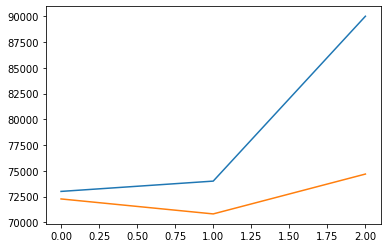

In [300]:
plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()

In [316]:
print('실제값:',inv_y)
print('예측치:',inv_yhat)

실제값: [73000. 74000. 90000.]
예측치: [72269.92 70816.22 74684.8 ]


In [303]:
RMSE = mean_squared_error(inv_y, inv_yhat)**0.5
r2 = r2_score(inv_y, inv_yhat)

In [314]:
print('RMSE:',RMSE)
print('r2:',r2)

RMSE: 9041.108339136303
r2: -0.34738965418956047
